In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import tensorflow as tf

In [2]:
df=pd.read_csv('icing_data.csv')

In [3]:
df.index=df.iloc[:,0]

In [4]:
df=df.iloc[:,1:6]

In [5]:
df['Delta_T']=df['Ambient temperature [C]'].diff(1)
df['Delta_P']=df['output power [kW]'].diff(1)

In [6]:
df=df.fillna(0)
df

,Wind speed [m/s],Wind direction [deg],Ambient temperature [C],output power [kW],Ice detected,Delta_T,Delta_P
Timestamp,,,,,,,
1.1.2003 0:00,9.7,42.1,-15.7,1387,0,0.0,0.0
1.1.2003 0:10,9.3,44.9,-15.6,990,0,0.1,-397.0
1.1.2003 0:20,9.8,44.9,-15.3,1207,0,0.3,217.0
1.1.2003 0:30,9.8,45.8,-15.2,1097,0,0.1,-110.0
1.1.2003 0:40,10.1,45.5,-14.9,1217,0,0.3,120.0
...,...,...,...,...,...,...,...
30.12.2003 23:20,7.3,71.0,-9.6,511,0,0.1,248.0
30.12.2003 23:30,8.0,74.0,-9.5,753,0,0.1,242.0
30.12.2003 23:40,8.0,75.6,-9.3,632,0,0.2,-121.0


In [7]:
df.describe()

,Wind speed [m/s],Wind direction [deg],Ambient temperature [C],output power [kW],Ice detected,Delta_T,Delta_P
count,47389.000000,47389.000000,47389.000000,47389.000000,47389.000000,47389.000000,47389.000000
mean,6.325573,178.460926,0.124193,487.455886,0.035683,0.000139,-0.015257
std,3.058162,109.563143,9.308080,559.845357,0.185502,0.255568,145.889545
min,0.000000,0.000000,-27.300000,0.000000,0.000000,-7.800000,-1843.000000
25%,4.100000,60.500000,-6.300000,49.000000,0.000000,-0.100000,-49.000000
50%,6.000000,214.800000,-0.200000,260.000000,0.000000,0.000000,0.000000
75%,8.200000,259.900000,6.500000,752.000000,0.000000,0.100000,48.000000
max,22.400000,360.000000,25.900000,2050.000000,1.000000,8.800000,1581.000000


## Data Visualization

NameError: name 'i' is not defined

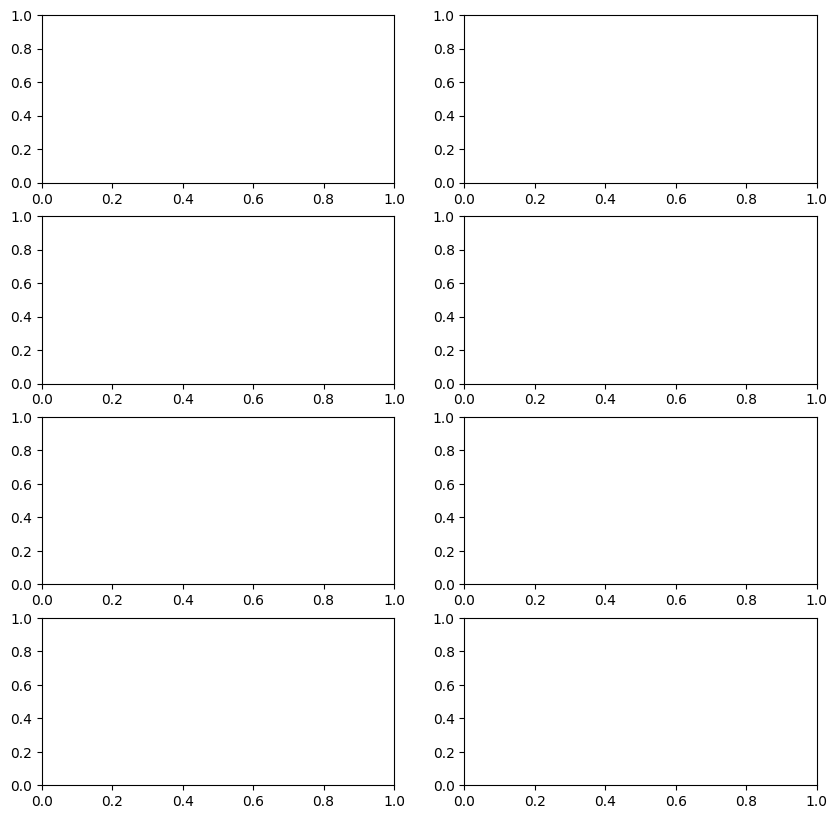

In [9]:
import seaborn as sns
fig, axs = plt.subplots(4, 2, figsize=(10, 10))
colors=["skyblue","teal","olive","gold","red","blue","black"]
#for i in range(1,8,1):
plt.subplot(4,2,1)
    #sns.histplot(data=df, x=df.iloc[:,i-1], kde=False, color=colors[i-1])
    #plt.plot(df.iloc[:,i-1],color=colors[i-1])
sns.lineplot(data=df, x=df.index,y=df.iloc[:,i-1],color=colors[i-1])

<Axes: xlabel='Ambient temperature [C]', ylabel='output power [kW]'>

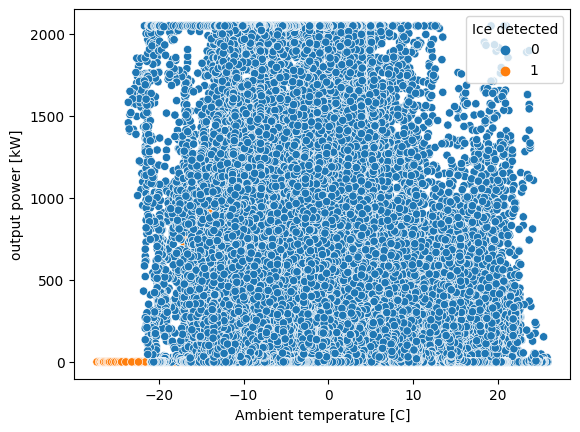

In [10]:
sns.scatterplot(data=df,x=df['Ambient temperature [C]'],y=df['output power [kW]'],hue="Ice detected")

<Axes: xlabel='Ice detected', ylabel='output power [kW]'>

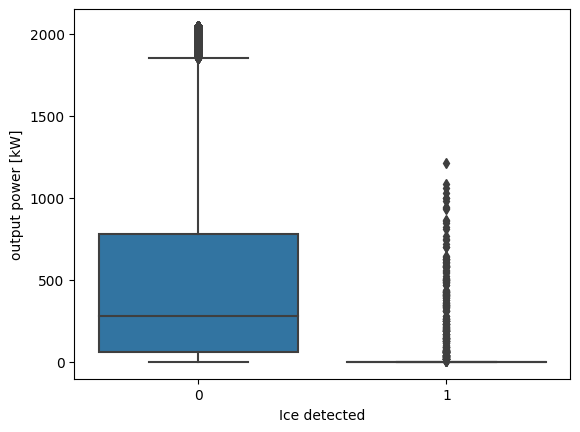

In [11]:
sns.boxplot(x=df['Ice detected'],y=df['output power [kW]'])

<Axes: xlabel='output power [kW]', ylabel='Count'>

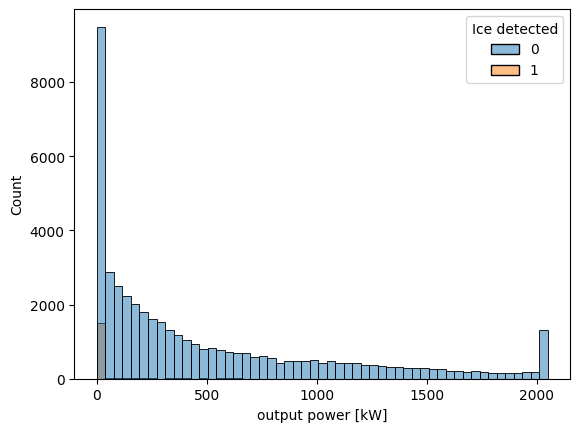

In [12]:
sns.histplot(data=df, x="output power [kW]", hue="Ice detected")

In [13]:
label=df['Ice detected']

## Feature Engineering Module

In [14]:
features=df.iloc[:,[0,1,2,3,5,6]]
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
Xtransformed=scaler.fit_transform(features)
df_new=pd.DataFrame(Xtransformed,columns=['Windspeed','Wind_direction','Temp','Power','Delta_T','Delta_P'])
df_new.index=df.index
df_new['Label']=label

In [15]:
df_new

,Windspeed,Wind_direction,Temp,Power,Delta_T,Delta_P,Label
Timestamp,,,,,,,
1.1.2003 0:00,1.103428,-1.244601,-1.700067,1.606789,-0.000545,0.000105,0
1.1.2003 0:10,0.972629,-1.219044,-1.689324,0.897658,0.390745,-2.721161,0
1.1.2003 0:20,1.136128,-1.219044,-1.657093,1.285269,1.173325,1.487547,0
1.1.2003 0:30,1.136128,-1.210830,-1.646350,1.088784,0.390745,-0.753898,0
1.1.2003 0:40,1.234227,-1.213568,-1.614119,1.303131,1.173325,0.822653,0
...,...,...,...,...,...,...,...
30.12.2003 23:20,0.318635,-0.980823,-1.044716,0.042055,0.390745,1.700039,0
30.12.2003 23:30,0.547533,-0.953441,-1.033972,0.474322,0.390745,1.658911,0
30.12.2003 23:40,0.547533,-0.938838,-1.012485,0.258189,0.782035,-0.829299,0


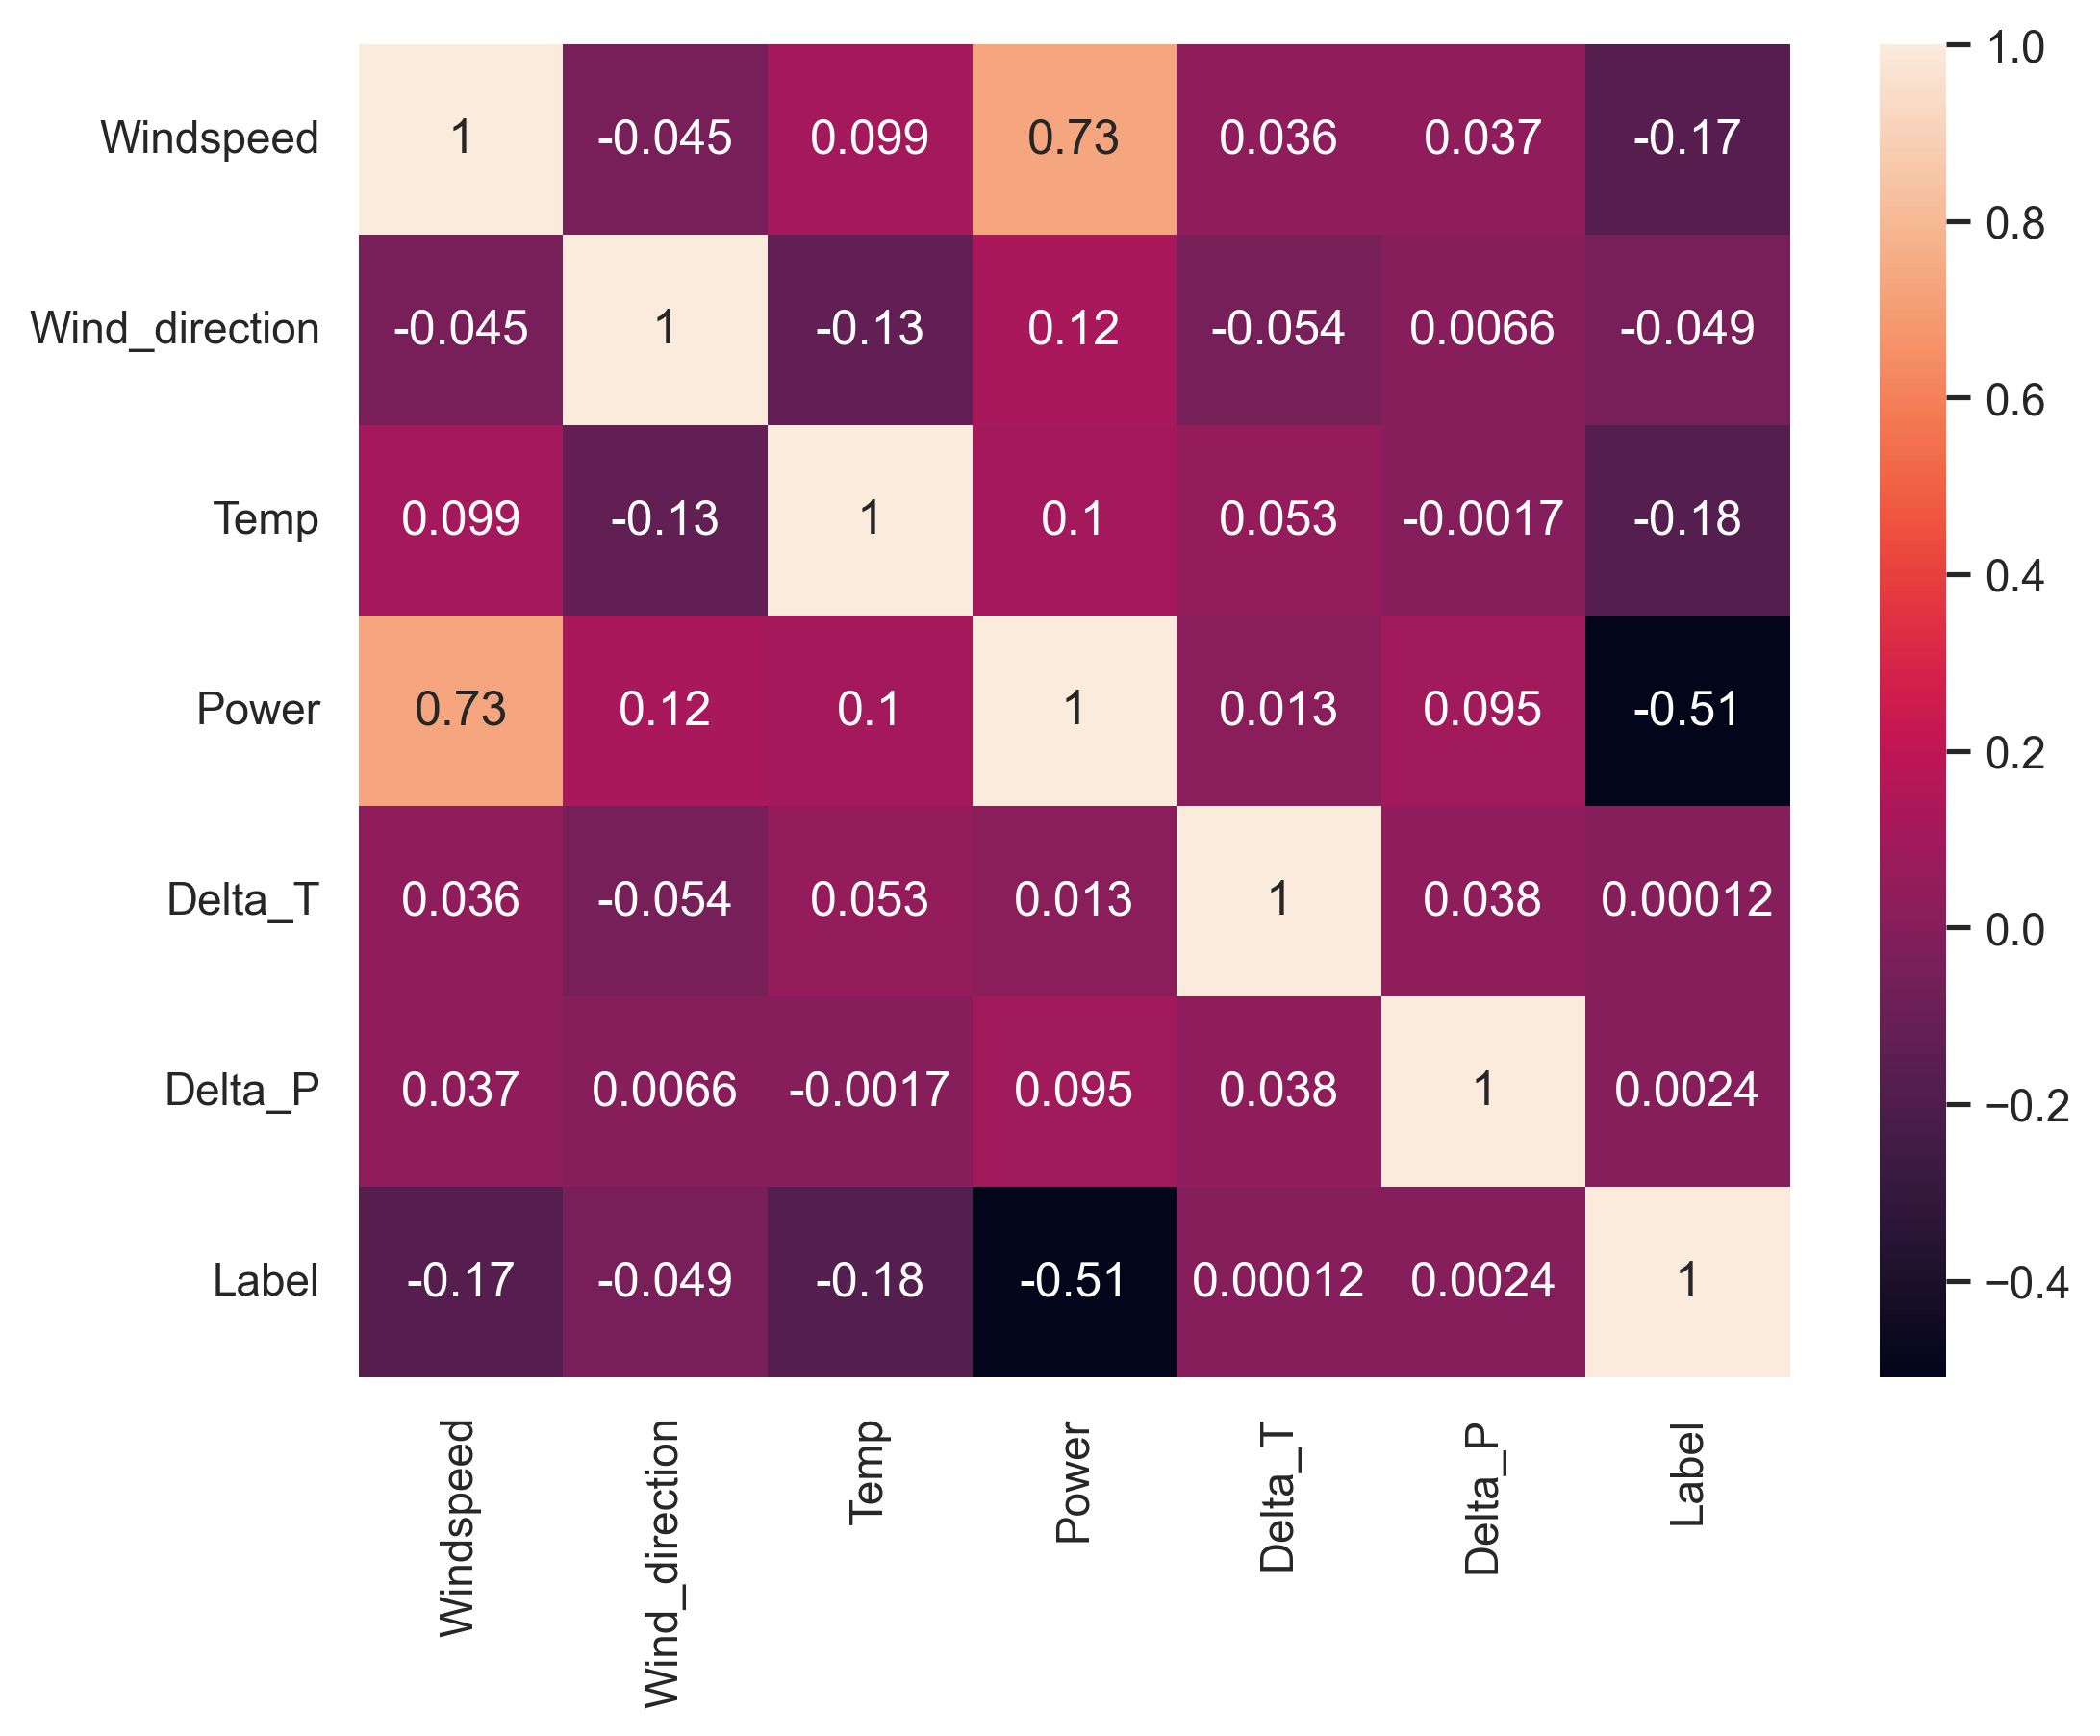

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6), dpi=300)  # Set figure size and high DPI
sns.set_theme(style='white')  # Keep your theme
sns.heatmap(df_new.iloc[:3500, :].corr(), annot=True)
plt.show()



In [18]:
df_1=df_new.loc[df_new['Label']==1]

In [19]:
Xtrain_1=df_1.iloc[:,:6]
ytrain_1=df_1.iloc[:,6]

<Axes: xlabel='Power', ylabel='Count'>

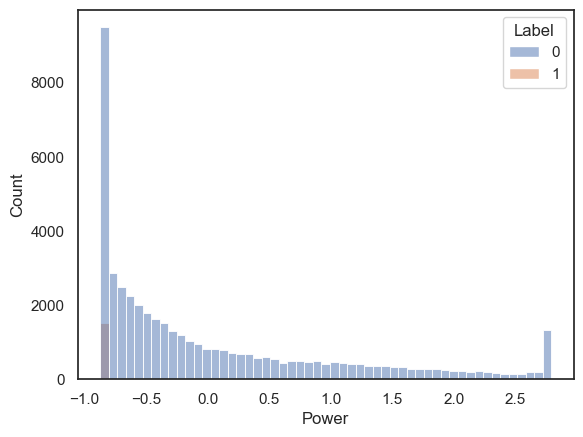

In [20]:
sns.histplot(data=df_new, x="Power", hue="Label")

In [21]:
X=df_new.iloc[:,:-1]
y=df_new.iloc[:,-1]

In [22]:
lst = [1,2,3,4,5,6,7,8]
def sliding_window(elements, window_size):
    if len(elements)== window_size:
        return elements
    for i in range(0,len(elements) - window_size,1):
        print(elements[i:i+window_size])
sliding_window(lst, 2)

[1, 2]
[2, 3]
[3, 4]
[4, 5]
[5, 6]
[6, 7]


## Transformer Architecture

In [23]:
from sklearn.model_selection import train_test_split
X=np.array(X)
y=np.array(y)
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2)

In [24]:
xtrain = xtrain.reshape((xtrain.shape[0],xtrain.shape[1],1))
xtest = xtest.reshape((xtest.shape[0],xtest.shape[1],1))
n_classes = len(np.unique(ytrain))

In [25]:
print(xtrain.shape)

(37911, 6, 1)


In [26]:
from tensorflow import keras
from tensorflow.keras import layers

In [27]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

In [28]:
def build_model(input_shape,head_size,num_heads,ff_dim,num_transformer_blocks,mlp_units,dropout=0,mlp_dropout=0,):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(n_classes, activation="softmax")(x)
    return keras.Model(inputs, outputs)

In [29]:
input_shape = xtrain.shape[1:]

model = build_model(input_shape,head_size=256,num_heads=1,ff_dim=4,num_transformer_blocks=4,mlp_units=[128],mlp_dropout=0.4,dropout=0.25,)
model.compile(loss="sparse_categorical_crossentropy",optimizer=keras.optimizers.Adam(learning_rate=1e-4),
metrics=["accuracy"],)
model.summary()
callbacks = [keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]
model.fit(xtrain,ytrain,validation_split=0.2,epochs=25,batch_size=256,callbacks=callbacks,verbose=1)
ypred=model.predict(xtest)


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 6, 1)]       0           []                               
                                                                                                  
 layer_normalization (LayerNorm  (None, 6, 1)        2           ['input_1[0][0]']                
 alization)                                                                                       
                                                                                                  
 multi_head_attention (MultiHea  (None, 6, 1)        1793        ['layer_normalization[0][0]',    
 dAttention)                                                      'layer_normalization[0][0]']    
                                                                                              

2023-07-07 22:32:04.268048: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


119/119 [==============================] - 14s 75ms/step - loss: 0.6455 - accuracy: 0.6331 - val_loss: 0.3279 - val_accuracy: 0.9560
Epoch 2/25
119/119 [==============================] - 8s 65ms/step - loss: 0.2076 - accuracy: 0.9529 - val_loss: 0.1370 - val_accuracy: 0.9658
Epoch 3/25
119/119 [==============================] - 8s 68ms/step - loss: 0.1644 - accuracy: 0.9622 - val_loss: 0.1276 - val_accuracy: 0.9660
Epoch 4/25
119/119 [==============================] - 8s 68ms/step - loss: 0.1527 - accuracy: 0.9630 - val_loss: 0.1221 - val_accuracy: 0.9660
Epoch 5/25
119/119 [==============================] - 8s 69ms/step - loss: 0.1450 - accuracy: 0.9624 - val_loss: 0.1147 - val_accuracy: 0.9658
Epoch 6/25
119/119 [==============================] - 8s 69ms/step - loss: 0.1385 - accuracy: 0.9627 - val_loss: 0.1096 - val_accuracy: 0.9658
Epoch 7/25
119/119 [==============================] - 8s 70ms/step - loss: 0.1347 - accuracy: 0.9626 - val_loss: 0.1054 - val_accuracy: 0.9658
Epoch 8/2

In [30]:
model.evaluate(xtest, ytest, verbose=1)

297/297 [==============================] - 5s 17ms/step - loss: 0.0671 - accuracy: 0.9683


[0.06713175773620605, 0.9683477282524109]

In [31]:
#Convert prob into labels
out=[]
for i in range((ypred.shape[0])):
    if ypred[i,0]>ypred[i,1]:
       out.append(0)
    else:
       out.append(1)

In [32]:
from sklearn.metrics import classification_report
print(classification_report(ytest,out))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      9120
           1       0.67      0.32      0.43       358

    accuracy                           0.97      9478
   macro avg       0.82      0.65      0.71      9478
weighted avg       0.96      0.97      0.96      9478



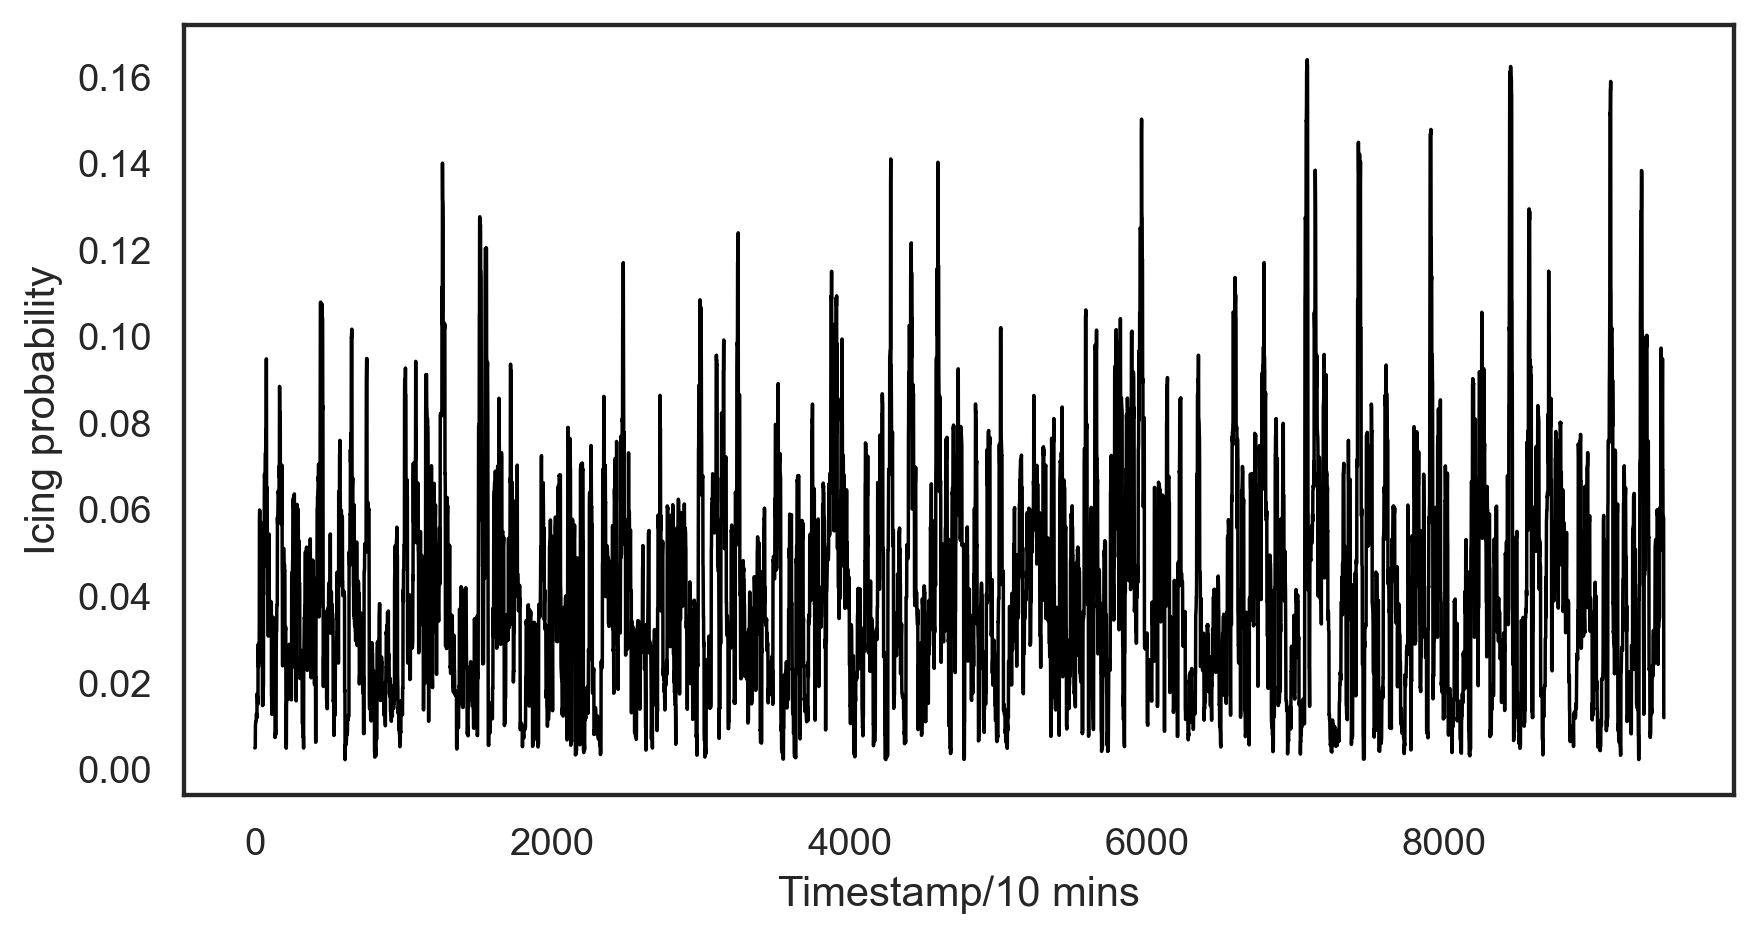

In [33]:
#plot icing probability
fig = plt.figure(figsize =(8,4))
fig.set_dpi(250)
#fig = plt.figure(facecolor ="white")

kernel_size=20
kernel=np.ones(kernel_size)/kernel_size
data_convolved = np.convolve(ypred[:,1], kernel, mode='same')

plt.plot(data_convolved,color='black',lw=1)
plt.xlabel('Timestamp/10 mins')
plt.ylabel('Icing probability')
plt.savefig("icing_probability.png")
plt.show()


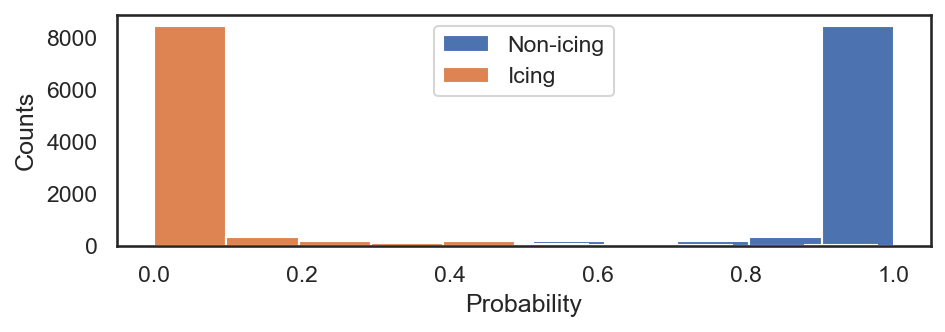

In [34]:
fig = plt.figure(figsize =(7,2))
fig.set_dpi(150)
plt.hist(ypred[:,0])
plt.hist(ypred[:,1])
plt.xlabel('Probability')
plt.ylabel('Counts')
plt.legend(['Non-icing','Icing'],loc=9)
plt.savefig("icing_probability_hist.png")
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
cm=confusion_matrix(ytest,out)

In [ ]:
print(cm)

In [ ]:
print(classification_report(ytest,out))

## SMOTE

In [ ]:
import imblearn
from imblearn.over_sampling import SMOTE

# CNN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix

In [ ]:
def evaluate_model(xtrain, ytrain, xtest, ytest,p):
    model = Sequential()
    model.add(Conv1D(filters=p, kernel_size=3, activation='relu', input_shape=(xtrain.shape[1],1)))
    model.add(Conv1D(filters=p, kernel_size=3, activation='relu'))
    model.add(Dropout(0.5))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.fit(xtrain, ytrain, epochs=25, batch_size=128, verbose=1)
    _, accuracy = model.evaluate(xtest, ytest, batch_size=128, verbose=1)
    ypred_CNN=model.predict(xtest)
    #cm_CNN=confusion_matrix(ytest,ypred_CNN)
    return ypred_CNN

In [ ]:
def summarize_results(scores, params):
	print(scores, params)
	# summarize mean and standard deviation
	for i in range(len(scores)):
		m, s = mean(scores[i]), std(scores[i])
		print('Param=%d: %.3f%% (+/-%.3f)' % (params[i], m, s))
	# boxplot of scores
	pyplot.boxplot(scores, labels=params)
	pyplot.savefig('exp_cnn_kernel.png')

In [ ]:
#def run_experiment(xtrain, ytrain, xtest, ytest,params, repeats=10):
	# load data
	#trainX, trainy, testX, testy = load_dataset()
	# test each parameter
#		all_scores = list()
#		for p in params:
#				print("Model training..... for filter size {}".format(p))
#				scores = list()
#				for r in range(repeats):
#					  cm_CNN = evaluate_model(xtrain, ytrain, xtest, ytest,p)
#				#score = score * 100
#				#print('>p=%d #%d: %.3f' % (p, r+1, score))
#	  		    print('Confusion matrix for filter size {}'.format(p) 'is',cm_CNN)
#					scores.append(score)
#		all_scores.append(scores)
	# summarize results
	#summarize_results(all_scores, params)

# run the experiment
n_params = 8
#run_experiment(xtrain, ytrain, xtest, ytest,n_params)
#xtrain1=X_train_compressed
#print(xtrain1.shape)
#ytrain1=y_train
#xtest1=X_test_compressed
#ytest1=y_test
evaluate_model(xtrain,ytrain,xtest,ytest,n_params)
#evaluate_model(X_train_compressed, y_train, X_test_compressed,y_test,n_params)

In [ ]:
ypred_CNN= model.predict(xtest)

In [ ]:
#Convert prob into labels
out=[]
ypred=ypred_CNN
for i in range((ypred.shape[0])):
    if ypred[i,0]>ypred[i,1]:
       out.append(0)
    else:
       out.append(1)

In [ ]:
#plot icing probability
fig = plt.figure(figsize =(8,4))
fig.set_dpi(250)
#fig = plt.figure(facecolor ="white")

kernel_size=20
kernel=np.ones(kernel_size)/kernel_size
data_convolved = np.convolve(ypred[:,1], kernel, mode='same')

plt.plot(data_convolved,color='black',lw=1)
plt.xlabel('Timestamp/10 mins')
plt.ylabel('Icing probability')
plt.savefig("icing_probability.png")
plt.show()


In [ ]:
fig = plt.figure(figsize =(7,2))
fig.set_dpi(150)
plt.hist(ypred[:,0])
plt.hist(ypred[:,1])
plt.xlabel('Probability')
plt.ylabel('Counts')
plt.legend(['Non-icing','Icing'],loc=9)
plt.savefig("icing_probability_hist.png")
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

# CNN-LSTM

In [ ]:
X=np.array(X)
y=np.array(y)
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2)

In [ ]:
def CNN_LSTM(xtrain,ytrain,xtest,ytest,n_steps, n_length, n_features):
    from keras.models import Sequential
    from keras.layers import Dense
    from keras.layers import Flatten
    from keras.layers import Dropout
    from keras.layers import LSTM
    from keras.layers import TimeDistributed
    from keras.layers.convolutional import Conv1D
    from keras.layers.convolutional import MaxPooling1D
    xtrain = xtrain.reshape((xtrain.shape[0], n_steps,n_features, n_length))
    xtest = xtest.reshape((xtest.shape[0], n_steps, n_features, n_length))
    # define model
    model = Sequential()
    model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu'),input_shape=(None,1,1)))
    model.add(TimeDistributed(Conv1D(filters=64, kernel_size=3, activation='relu')))
    model.add(TimeDistributed(Dropout(0.5)))
    model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
    model.add(TimeDistributed(Flatten()))
    model.add(LSTM(100))
    model.add(Dropout(0.5))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    print("CNN-LSTM Model training begins.....")
    import time
    start=time.time()
    model.fit(xtrain, ytrain, epochs=25, batch_size=128, verbose=1)
    stop=time.time()
    ypred_CNN_LSTM=model.predict(xtest)
    from sklearn.metrics import classification_report
    #clf=classification_report(ytest,ypred_CNN_LSTM)
    cm_CNN_LSTM=confusion_matrix(ytest,ypred_CNN_LSTM)
    return print(cm_CNN_LSTM),print("The training time for CNN-LSTM is{} seconds".format(stop-start))

In [ ]:
CNN_LSTM(xtrain,ytrain,xtest,ytest,1,1,xtrain.shape[1])

# ML techniques- SVM, DT, RF, Logit

In [ ]:
def MLModels(X,y,name):
    acc=[] #empty list for accuracy
    from statistics import mean
    Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2)
    if name=='SVM':
       from sklearn.svm import SVC
       import math
       kernel_list=['linear','poly','rbf','sigmoid']
       for i in kernel_list:
          model_SVC=SVC(kernel=i)
          model_SVC.fit(Xtrain,ytrain)
          yhat_SVC=model_SVC.predict(Xtest)
          acc.append([i,model_SVC.score(Xtest,ytest)])
    elif name=='DT':
         from sklearn.tree import DecisionTreeClassifier
         for i in range(1,50):
             model_tree=DecisionTreeClassifier(criterion="gini",max_depth=i,min_samples_leaf=5)
             model_tree.fit(Xtrain,ytrain)
             y_tree=model_tree.predict(Xtest)
             acc.append(model_tree.score(Xtest,ytest))
         acc=mean(acc)
    else:
         from sklearn.neighbors import KNeighborsClassifier
         for k in range(1,10):
              model=KNeighborsClassifier(n_neighbors=k)
              #start_time=datetime.now()
              model.fit(Xtrain,ytrain)
              #end_time=datetime.now()
              #acc=model.score(X_train,y_train)*100
              #ft=end_time-start_time
              yhat=model.predict(Xtest)
              acc.append(model.score(Xtest,ytest))
         acc=mean(acc)
    return print("The accuracy for {} is {}".format(name,acc))


In [ ]:
MLModels(X,y,'KNN')

# Generative Family- Classical AE

In [ ]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot

In [ ]:
X.shape

In [ ]:
X_train=X[:37911,:]
X_test=X[37911:,:]

In [ ]:
y_train=y[:37911,]
y_test=y[37911:,]

In [ ]:
n_inputs=X_train.shape[1]

In [ ]:
# Encoder
visible = Input(shape=(n_inputs,))
# encoder level 1
e = Dense(n_inputs*2)(visible)
e = BatchNormalization()(e)
e = LeakyReLU()(e)
# encoder level 2
e = Dense(n_inputs)(e)
e = BatchNormalization()(e)
e = LeakyReLU()(e)

In [ ]:
#Bottleneck
n_bottleneck = round(float(n_inputs) / 2.0)+1
bottleneck = Dense(n_bottleneck)(e)

In [ ]:
# define decoder, level 1
d = Dense(n_inputs)(bottleneck)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# decoder level 2
d = Dense(n_inputs*2)(d)
d = BatchNormalization()(d)
d = LeakyReLU()(d)
# output layer
output = Dense(n_inputs, activation='linear')(d)

In [ ]:
model = Model(inputs=visible, outputs=output)
# compile autoencoder model
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

In [ ]:
# plot the autoencoder
plot_model(model, 'autoencoder_compress.png', show_shapes=True)
# fit the autoencoder model to reconstruct input
history = model.fit(X_train, X_train, epochs=150, batch_size=128, verbose=2, validation_data=(X_test,X_test))
# plot loss
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
encoder = Model(inputs=visible, outputs=bottleneck)
plot_model(encoder, 'encoder_compress.png', show_shapes=True)
# save the encoder to file
encoder.save('encoder.h5')

In [ ]:
encoder.summary()

In [ ]:
#Create new features from Autoencoders:
X_train_compressed=encoder.predict(X_train)
X_test_compressed=encoder.predict(X_test)

In [ ]:
X_train_compressed = X_train_compressed.reshape((X_train_compressed.shape[0],X_train_compressed.shape[1],1))
X_test_compressed = X_test_compressed.reshape((X_test_compressed.shape[0],X_test_compressed.shape[1],1))

In [ ]:
print(X_train_compressed.shape)

In [ ]:
X_train_compressed

In [ ]:
input_shape = X_train_compressed.shape[1:]

model = build_model(input_shape,head_size=256,num_heads=1,ff_dim=4,num_transformer_blocks=4,mlp_units=[128],mlp_dropout=0.4,dropout=0.25,)
model.compile(loss="sparse_categorical_crossentropy",optimizer=keras.optimizers.Adam(learning_rate=1e-4),
metrics=["accuracy"],)
model.summary()
callbacks = [keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)]
model.fit(X_train_compressed,y_train,validation_split=0.2,epochs=25,batch_size=256,callbacks=callbacks,verbose=0)
ypred=model.predict(X_test_compressed)


In [ ]:
from sklearn.metrics import confusion_matrix
out=[]
for i in range((ypred.shape[0])):
    if ypred[i,0]>ypred[i,1]:
       out.append(0)
    else:
       out.append(1)
confusion_matrix(y_test,out)

# Autoencoder-CNN

In [ ]:
evaluate_model(X_train_compressed,y_train,X_test_compressed,y_test,8)

In [ ]:
CNN_LSTM(X_train_compressed,y_train,X_test_compressed,y_test,1,1,X_train_compressed.shape[1])